In [1]:
#!pip install seaborn

In [2]:
#!kaggle competitions download -c dlsprint

In [3]:
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
from IPython import display as ipd

# visualization
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
#system files
import os

# PyTorch 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torch.cuda import amp
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train = pd.read_csv('train.csv')
df_validation = pd.read_csv('validation.csv')

In [5]:
df_train

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale
0,6c274d3678353b62f5d3465c771e4a8c5cd917186a5323...,common_voice_bn_30991326.mp3,বাবা সত্যেন ঘোষ।,1.0,1.0,NaN,NaN,NaN,bn
1,3991c2cfe1be64e77f2f6bdaeaae601219af906c1295cd...,common_voice_bn_30991371.mp3,দেওয়ান ফরিদ গাজী বাংলাদেশ আওয়ামী লীগের উপদেষ...,1.0,0.0,NaN,NaN,NaN,bn
2,3991c2cfe1be64e77f2f6bdaeaae601219af906c1295cd...,common_voice_bn_30991410.mp3,এর মাধ্যমে কারও গান গাওয়া দক্ষতা বা নিজস্ব ধর...,0.0,0.0,NaN,NaN,NaN,bn
3,08cb638755d8adbe55e3149211af88853e0d77785397f9...,common_voice_bn_30991432.mp3,"আপনি খুব একটা কথা বলার লোক নন, তাই না?",0.0,0.0,NaN,NaN,NaN,bn
4,51215b6882d5fdc8a9856b095793244085341470a888f5...,common_voice_bn_30991478.mp3,"আপনি খুব একটা কথা বলার লোক নন, তাই না?",0.0,0.0,NaN,NaN,চট্টগ্রামের ভাষার সামান্য টানসহ মোটামুটি প্রমি...,bn
...,...,...,...,...,...,...,...,...,...
206945,0a0db76f30e3d011216425efa204fa0d3064767656b913...,common_voice_bn_31802418.mp3,রাণীগঞ্জ মূলত এখানকার কয়লা খনি এবং খনিজ সংক্র...,2.0,0.0,twenties,male,রাঢ়ী উপভাষা,bn
206946,0a0db76f30e3d011216425efa204fa0d3064767656b913...,common_voice_bn_31802540.mp3,"ওহাইও নদীর মুখোমুখি অবস্থিত, কারখানাটি লম্বা এ...",2.0,0.0,twenties,male,রাঢ়ী উপভাষা,bn
206947,0a0db76f30e3d011216425efa204fa0d3064767656b913...,common_voice_bn_31802606.mp3,"উল্লেখ্য যে, আইন অমান্য আন্দোলনে বাংলার মুসলমা...",2.0,0.0,twenties,male,রাঢ়ী উপভাষা,bn
206948,0a0db76f30e3d011216425efa204fa0d3064767656b913...,common_voice_bn_31815460.mp3,তিনি রাজস্থানের প্রতাপগড় জেলা থেকে রাজস্থান ব...,2.0,0.0,twenties,male,রাঢ়ী উপভাষা,bn


In [6]:
df_validation

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale
0,c0494c8220a53efec93f188e32be94d3c1832c48117423...,common_voice_bn_31621610.mp3,"কৃষি, সেবা, রেমিটেন্স, ব্যবসা ও অন্যান্য।",3.0,0.0,NaN,NaN,NaN,bn
1,c0494c8220a53efec93f188e32be94d3c1832c48117423...,common_voice_bn_31621614.mp3,তিনি ছিলেন চাকমা ভাষার প্রথম আধুনিক গীতিকার।,6.0,1.0,NaN,NaN,NaN,bn
2,c06b36547c86713d53bb2bf696a34b696de586c5ab1aa9...,common_voice_bn_31600766.mp3,ইংরেজির সাথে সাথে তাদের হিন্দী ও সংস্কৃত শিক্ষ...,3.0,1.0,NaN,NaN,NaN,bn
3,c06b36547c86713d53bb2bf696a34b696de586c5ab1aa9...,common_voice_bn_31600769.mp3,শিখর ধাওয়ান তার প্রথম আন্তর্জাতিক উইকেট শিকার...,3.0,0.0,NaN,NaN,NaN,bn
4,c07f5f84eaa5f8c8dc964033eb96d4c544d2463c51768b...,common_voice_bn_31513081.mp3,"চতুর্থ সপ্তাহ থেকে অবস্থার উন্নতি হতে থাকে,কিন...",20.0,1.0,NaN,NaN,NaN,bn
...,...,...,...,...,...,...,...,...,...
7742,09e250239a19db6c31ba64f9e10340c17508a0a8bdfc66...,common_voice_bn_30998756.mp3,তবে রোগাক্রান্ত পোষা বিড়ালের মাধ্যমে এটি বেশি...,2.0,0.0,NaN,NaN,NaN,bn
7743,09e250239a19db6c31ba64f9e10340c17508a0a8bdfc66...,common_voice_bn_30998849.mp3,পেল ও সহযোগী পেল সংখ্যাগুলি লুকাস ধারার অন্তর্গত।,2.0,1.0,NaN,NaN,NaN,bn
7744,09e250239a19db6c31ba64f9e10340c17508a0a8bdfc66...,common_voice_bn_30998861.mp3,গমের আটা এবং পুরো গমের ময়দার মধ্যে পার্থক্য কী?,2.0,0.0,NaN,NaN,NaN,bn
7745,69545be87267c6177baaa60a16a7f474278642c4cec3d8...,common_voice_bn_31515352.mp3,এই প্রজাতি জঙ্গলে আবদ্ধ থাকতেই পছন্দ করে।,3.0,0.0,NaN,NaN,NaN,bn


In [7]:
!cd test_files && echo "Test files" && find . -maxdepth 1 -type f | sed 's/.*\.//' | sort | uniq -c
!cd train_files && echo "Train files" &&find . -maxdepth 1 -type f | sed 's/.*\.//' | sort | uniq -c
!cd validation_files && echo "Validation files" && find . -maxdepth 1 -type f | sed 's/.*\.//' | sort | uniq -c

Test files
   7747 mp3
Train files
 206950 mp3
Validation files
   7747 mp3


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206950 entries, 0 to 206949
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   206950 non-null  object 
 1   path        206950 non-null  object 
 2   sentence    206950 non-null  object 
 3   up_votes    206950 non-null  float64
 4   down_votes  206950 non-null  float64
 5   age         60309 non-null   object 
 6   gender      61196 non-null   object 
 7   accents     11088 non-null   object 
 8   locale      206950 non-null  object 
dtypes: float64(2), object(7)
memory usage: 14.2+ MB


In [9]:
def get_all_unique_values(df):
    df_empty = {}
    for i in df.columns:
        df_empty[i] = df[i].unique()
    return df_empty

In [10]:
def missing_data(df):
    a = df.isnull().sum()
    a=a.tolist()
    percent_missing = [ int(x)* 100 / len(df) for x in a]
    error_per = pd.DataFrame({
        'Columns':df.columns,         
        'Total error': a,
        'Error Percentage': percent_missing
    })
    print(tabulate(error_per, headers=['column','total error','error percentage']))
    sns.barplot(x='Columns',y='Error Percentage',data=error_per)
    plt.ylabel('missing  %')
    plt.xticks(rotation=70)

    column        total error    error percentage
--  ----------  -------------  ------------------
 0  client_id               0              0
 1  path                    0              0
 2  sentence                0              0
 3  up_votes                0              0
 4  down_votes              0              0
 5  age                146641             70.8582
 6  gender             145754             70.4296
 7  accents            195862             94.6422
 8  locale                  0              0


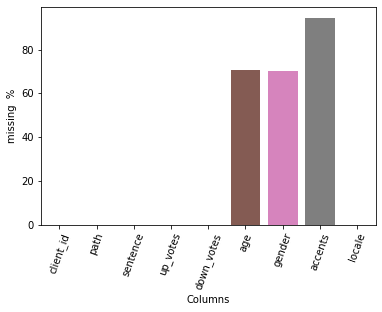

In [11]:
missing_data(df_train)

    column        total error    error percentage
--  ----------  -------------  ------------------
 0  client_id               0              0
 1  path                    0              0
 2  sentence                0              0
 3  up_votes                0              0
 4  down_votes              0              0
 5  age                  6873             88.7182
 6  gender               6871             88.6924
 7  accents              7455             96.2308
 8  locale                  0              0


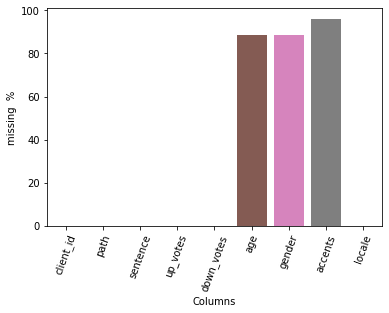

In [12]:
missing_data(df_validation)

In [13]:
get_all_unique_values(df_train)

{'client_id': array(['6c274d3678353b62f5d3465c771e4a8c5cd917186a5323497695880dbd3a82238154d71878f85462e83184d84a72be6d52425458911cf18b0c96338ba824baa2',
        '3991c2cfe1be64e77f2f6bdaeaae601219af906c1295cd3d854c86c41965f6c1c284e816fa492df31d343a209243bd58cadc94b5d92cdca8cb3e937d83b875f4',
        '08cb638755d8adbe55e3149211af88853e0d77785397f9ca89e6eb3495cc52866ab4fe3037e04766f68b6e0a0ebf1a0eb78a8f12efb9e606ff14b9a030d4cb77',
        ...,
        '2011cb08c2a3c838ac1896fbdb86bd7d85525beba871c7f63c34a8389d288a9ffd6fc90ea7170507d9185ce05cef12db5410833c794c22a4f4751f509d7e5af9',
        '83e587c0ffcd09c7b15e7085ce3c789d2ba17a5e8d473d360818220092b8ca2e88aeb71866cfadb9a012a40271fc2bf5d3625fcba0ca8ad61ed3a3dd4a1a9df3',
        '66b7a91661a2573ea9b0475598a88da5133e08ef8fbcbc58424b9f14c38bf3394fee4fab344c5c993bbc223d4d4dcf42a4ad99ebf65c93500af1229dfc6389ed'],
       dtype=object),
 'path': array(['common_voice_bn_30991326.mp3', 'common_voice_bn_30991371.mp3',
        'common_voice_bn_309914

In [14]:
get_all_unique_values(df_validation)

{'client_id': array(['c0494c8220a53efec93f188e32be94d3c1832c48117423f9b08260fd8e108a03af7305265d3a8543343d4bb7811dba5520a1baad61b50ec36c16b80025673b69',
        'c06b36547c86713d53bb2bf696a34b696de586c5ab1aa9501a205c4f170b4da540f98502353cec003e32a67a2ec0c57ce1ffc0dd9e8af070f1f3ab40a048f947',
        'c07f5f84eaa5f8c8dc964033eb96d4c544d2463c51768b748a1171099b478c23e1b0bea3f745cc0595faefefde58767d43d1f7fb5763ee87ef70c5c86d5bcfb4',
        ...,
        '08a59c03c493d67b53adc4e81ba64cba36d5405c0c565e16bbc9620d67df696e20e49dbe95db0ca8f0f39dd2b6c121d6d683574eaba8e6ca4087d9b47ea58e34',
        '09e250239a19db6c31ba64f9e10340c17508a0a8bdfc66d40003165a1dc1f8b8bb67d2a164feebd4b7159a2466b7e9f6d1b79de81a40002fee38401d5a7ec050',
        '69545be87267c6177baaa60a16a7f474278642c4cec3d880a154ad9ee4e40194ce9fd73d8979789618d57c19b91511198689252ff9fc26c50be492bb2b3cd7f8'],
       dtype=object),
 'path': array(['common_voice_bn_31621610.mp3', 'common_voice_bn_31621614.mp3',
        'common_voice_bn_316007

In [15]:
df_train.drop(['age','gender','accents','locale'],axis=1)
df_validation.drop(['age','gender','accents','locale'],axis=1)

,client_id,path,sentence,up_votes,down_votes
0,c0494c8220a53efec93f188e32be94d3c1832c48117423...,common_voice_bn_31621610.mp3,"কৃষি, সেবা, রেমিটেন্স, ব্যবসা ও অন্যান্য।",3.0,0.0
1,c0494c8220a53efec93f188e32be94d3c1832c48117423...,common_voice_bn_31621614.mp3,তিনি ছিলেন চাকমা ভাষার প্রথম আধুনিক গীতিকার।,6.0,1.0
2,c06b36547c86713d53bb2bf696a34b696de586c5ab1aa9...,common_voice_bn_31600766.mp3,ইংরেজির সাথে সাথে তাদের হিন্দী ও সংস্কৃত শিক্ষ...,3.0,1.0
3,c06b36547c86713d53bb2bf696a34b696de586c5ab1aa9...,common_voice_bn_31600769.mp3,শিখর ধাওয়ান তার প্রথম আন্তর্জাতিক উইকেট শিকার...,3.0,0.0
4,c07f5f84eaa5f8c8dc964033eb96d4c544d2463c51768b...,common_voice_bn_31513081.mp3,"চতুর্থ সপ্তাহ থেকে অবস্থার উন্নতি হতে থাকে,কিন...",20.0,1.0
...,...,...,...,...,...
7742,09e250239a19db6c31ba64f9e10340c17508a0a8bdfc66...,common_voice_bn_30998756.mp3,তবে রোগাক্রান্ত পোষা বিড়ালের মাধ্যমে এটি বেশি...,2.0,0.0
7743,09e250239a19db6c31ba64f9e10340c17508a0a8bdfc66...,common_voice_bn_30998849.mp3,পেল ও সহযোগী পেল সংখ্যাগুলি লুকাস ধারার অন্তর্গত।,2.0,1.0
7744,09e250239a19db6c31ba64f9e10340c17508a0a8bdfc66...,common_voice_bn_30998861.mp3,গমের আটা এবং পুরো গমের ময়দার মধ্যে পার্থক্য কী?,2.0,0.0
7745,69545be87267c6177baaa60a16a7f474278642c4cec3d8...,common_voice_bn_31515352.mp3,এই প্রজাতি জঙ্গলে আবদ্ধ থাকতেই পছন্দ করে।,3.0,0.0
